In [3]:
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [5]:
## Interacting with LLMs
import os
from langchain.chat_models import init_chat_model

model_name = os.getenv('MODEL_NAME')
model_provider = os.getenv('MODEL_PROVIDER')

In [6]:
llm = init_chat_model(model=model_name, model_provider=model_provider)

c:\tmp\agentic_ai\Agentic_AI\langgraph\mailtoner\.venv\Lib\site-packages\google\cloud\aiplatform\models.py:52: FutureWarning: Support for google-cloud-storage < 3.0.0 will be removed in a future version of google-cloud-aiplatform. Please upgrade to google-cloud-storage >= 3.0.0.
  from google.cloud.aiplatform.utils import gcs_utils


In [7]:
llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 8, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 8}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0032640420831739902, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--690b4303-2ced-4ab7-a218-0c983c4c034a-0', usage_metadata={'input_tokens': 7, 'output_tokens': 8, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}})

In [8]:
## Messages
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage("You are an expert in Gen AI"),
    HumanMessage("How to find complexity of a program?")
]

In [9]:
response = llm.invoke(messages)

In [10]:
type(response)

langchain_core.messages.ai.AIMessage

In [11]:
print(response.content)

Finding the complexity of a program is a fundamental concept in computer science, crucial for understanding its efficiency and scalability. It's primarily about analyzing how the execution time or memory usage of a program grows as the size of the input increases.

Here's a breakdown of how to find the complexity of a program, focusing on **time complexity** (which is usually the primary concern):

## 1. Understand the Goal: Big O Notation

The standard way to express program complexity is using **Big O Notation**. It describes the **upper bound** of the growth rate of an algorithm's resource usage (time or space) as the input size approaches infinity. Big O ignores constant factors and lower-order terms, focusing on the dominant term that dictates the growth.

Common Big O Notations (from best to worst complexity):

*   **O(1) - Constant Time:** The execution time does not depend on the input size.
    *   *Example:* Accessing an element in an array by its index.
*   **O(log n) - Loga

In [12]:
response.pretty_print()

================================== Ai Message ==================================

Finding the complexity of a program is a fundamental concept in computer science, crucial for understanding its efficiency and scalability. It's primarily about analyzing how the execution time or memory usage of a program grows as the size of the input increases.

Here's a breakdown of how to find the complexity of a program, focusing on **time complexity** (which is usually the primary concern):

## 1. Understand the Goal: Big O Notation

The standard way to express program complexity is using **Big O Notation**. It describes the **upper bound** of the growth rate of an algorithm's resource usage (time or space) as the input size approaches infinity. Big O ignores constant factors and lower-order terms, focusing on the dominant term that dictates the growth.

Common Big O Notations (from best to worst complexity):

*   **O(1) - Constant Time:** The execution time does not depend on the input size.
    *

In [13]:
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate

In [14]:
prompt = PromptTemplate.from_template("You are an expert in {area}. Explain in three sentences what is {topic}")

In [15]:
prompt.invoke({'area':'Physics', 'topic': 'Inertia'})

StringPromptValue(text='You are an expert in Physics. Explain in three sentences what is Inertia')

In [16]:
chain = prompt | llm

In [17]:
response = chain.invoke({'area':'Physics', 'topic': 'Inertia'})

In [18]:
response.pretty_print()

================================== Ai Message ==================================

Inertia is the inherent property of matter that resists changes in its state of motion. This means an object at rest tends to stay at rest, and an object in motion tends to continue moving with the same velocity unless acted upon by an external force. The greater an object's mass, the more inertia it possesses, making it harder to alter its motion.


In [19]:
prompt = ChatPromptTemplate([
    ("system", "You are an expert in {area}. Explain the question in simple English"),
    ("user", "What is {topic}?")
])

In [20]:
chain = prompt | llm

In [21]:
response = chain.invoke({'area': 'Gen AI', 'topic': 'Agentic AI'})

In [22]:
response.pretty_print()

================================== Ai Message ==================================

Imagine you have a really smart helper, like a super-powered assistant. This assistant can not only follow instructions but also figure things out on its own to get the job done.

**Agentic AI** is like that super-powered assistant, but it's a computer program.

Here's a breakdown in simple terms:

*   **AI (Artificial Intelligence):** This is the broad idea of making computers smart, so they can do things that usually require human intelligence, like learning, problem-solving, and making decisions.

*   **Agent:** Think of "agent" like an actor or a spy. An agent is something that can **act** in the world to achieve a goal. It's not just passively receiving information; it's actively doing things.

*   **Agentic AI:** So, Agentic AI combines these two. It's a type of AI that is designed to be an **agent**. This means it can:

    *   **Understand a Goal:** You give it a task or an objective.
    *   **Ob

In [23]:
response = chain.invoke({'area': 'Gen AI', 'topic': 'RAG'})

In [24]:
response.pretty_print()

================================== Ai Message ==================================

Imagine you have a super-smart AI that can answer almost any question. That's great, but sometimes you want it to be even more helpful by giving it access to specific information it wouldn't normally know.

**RAG (Retrieval Augmented Generation)** is like giving that AI a special library and a librarian.

Here's the breakdown in simple terms:

*   **R (Retrieval):** This is like the librarian going to the special library to find relevant documents or information related to your question. The AI doesn't just guess; it actively *looks up* information.
*   **A (Augmented):** This means the AI takes the information it found from the library and uses it to *improve* its answer. It's like the librarian giving the AI notes and facts to make its response more accurate and detailed.
*   **G (Generation):** This is the AI using all the information it has (its general knowledge + the retrieved information) to *creat

### Conditional Edges

In [25]:
from typing import TypedDict, Literal
from langgraph.graph import START, END, StateGraph

In [26]:
class Math(TypedDict):
    a: int
    b: int
    oprn: Literal["add", "subtract", "multiply", "divide"]
    result: int

In [27]:
def add(state:Math) -> Math:
    state['result'] = state['a'] + state['b']
    return state

In [28]:
def subtract(state: Math) -> Math:
    state['result'] = state['a'] - state['b']
    return state

In [29]:
def multiply(state: Math) -> Math:
    state['result'] = state['a'] * state['b']
    return state

In [30]:
def divide(state: Math) -> Math:
    state['result'] = state['a'] // state['b']
    return state

In [31]:
def route(state: Math) -> Literal["Addition", "Subtraction", "Multiplication", "Division"]:
    if state['oprn'] == "add":
        return "Addition"
    elif state['oprn'] == "subtract":
        return "Subtraction"
    elif state['oprn'] == "multiply":
        return "Multiplication"
    else:
        return "Division"

In [32]:
math_graph = StateGraph(Math)
math_graph.add_node("Addition", add)
math_graph.add_node("Subtraction", subtract)
math_graph.add_node("Multiplication", multiply)
math_graph.add_node("Division", divide)
math_graph.add_conditional_edges(START, route)
math_graph.add_edge("Addition", END)
math_graph.add_edge("Subtraction", END)
math_graph.add_edge("Multiplication", END)
math_graph.add_edge("Division", END)

In [33]:
graph = math_graph.compile()

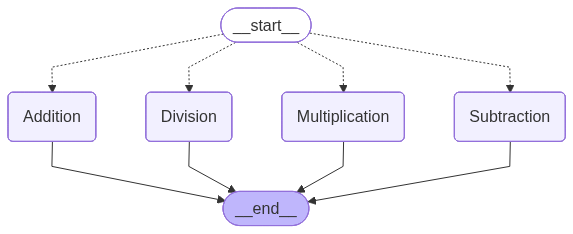

In [34]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [35]:
state = Math(a = 10, b = 5, oprn = 'add')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'add', 'result': 15}


In [36]:
state = Math(a = 10, b = 5, oprn = 'subtract')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'subtract', 'result': 5}


In [37]:
state = Math(a = 10, b = 5, oprn = 'multiply')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'multiply', 'result': 50}


In [38]:
state = Math(a = 10, b = 5, oprn = 'divide')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'divide', 'result': 2}


#### Method 2 - Boolean 

In [39]:
class New_Math(TypedDict):
    a: int
    b: int
    oprn: Literal["add", "subtract"]
    result: int

In [40]:
def is_add(state:New_Math) -> bool:
    if state['oprn'] == "add":
        return True
    else:
        return False

In [41]:
new_math_graph = StateGraph(New_Math)
new_math_graph.add_node("Addition", add)
new_math_graph.add_node("Subtraction", subtract)
new_math_graph.add_conditional_edges(
    START, 
    is_add,
    {True: 'Addition', False: 'Subtraction'}
)
new_math_graph.add_edge("Addition", END)
new_math_graph.add_edge("Subtraction", END)


In [42]:
new_graph = new_math_graph.compile()

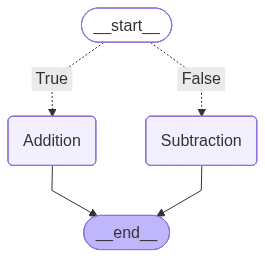

In [43]:
display(Image(new_graph.get_graph().draw_mermaid_png()))

In [44]:
state = New_Math(a = 5, b = 3, oprn = 'add')
result = new_graph.invoke(state)
print(result)

{'a': 5, 'b': 3, 'oprn': 'add', 'result': 8}


#### Method 3 - Lambda

In [45]:
f = lambda s: "Addition" if s['oprn'] == 'add' else "Subtraction"

In [46]:
f(New_Math(oprn = 'add'))

'Addition'

In [47]:
new_math_graph = StateGraph(New_Math)
new_math_graph.add_node("Addition", add)
new_math_graph.add_node("Subtraction", subtract)
new_math_graph.add_conditional_edges(
    START, 
    lambda s: "Addition" if s['oprn'] == 'add' else "Subtraction")
new_math_graph.add_edge("Addition", END)
new_math_graph.add_edge("Subtraction", END)


In [48]:
new_graph = new_math_graph.compile()

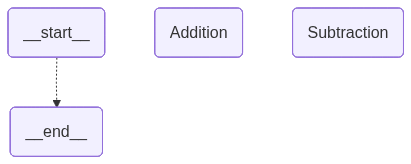

In [49]:
display(Image(new_graph.get_graph().draw_mermaid_png()))

In [50]:
new_math_graph = StateGraph(New_Math)
new_math_graph.add_node("Addition", add)
new_math_graph.add_node("Subtraction", subtract)
new_math_graph.add_conditional_edges(
    START, 
    lambda s: True if s['oprn'] == 'add' else False,
    {
        True: 'Addition',
        False: 'Subtraction'
    })
new_math_graph.add_edge("Addition", END)
new_math_graph.add_edge("Subtraction", END)

In [51]:
new_graph = new_math_graph.compile()

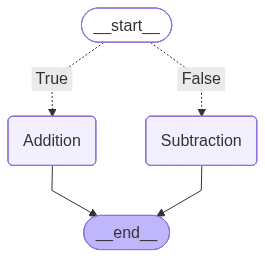

In [52]:
display(Image(new_graph.get_graph().draw_mermaid_png()))

In [53]:
state = Math(a=10, b=5, oprn='subtract')
result = new_graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'subtract', 'result': 5}


In [54]:
state = Math(a=10, b=5, oprn='add')
result = new_graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'add', 'result': 15}
